In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 15)
        self.fc2 = nn.Linear(15, 15)
        self.fc3 = nn.Linear(15, 10)

    def forward(self, input):
        flat = self.flatten(input)
        h1 = F.relu(self.fc1(flat))
        h2 = F.relu(self.fc2(h1))
        output = F.softmax(self.fc3(h2), dim=1)
        return output

In [2]:
from torchvision.datasets import MNIST

train_mnist = MNIST(root="datasets/", train=True, download=True)
test_mnist = MNIST(root="datasets/", download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 17488648.34it/s]


Extracting datasets/MNIST/raw/train-images-idx3-ubyte.gz to datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 3651084.87it/s]


Extracting datasets/MNIST/raw/train-labels-idx1-ubyte.gz to datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13102398.47it/s]


Extracting datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3650225.86it/s]

Extracting datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to datasets/MNIST/raw



In [3]:
net = Net()
net

Net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=15, bias=True)
  (fc2): Linear(in_features=15, out_features=15, bias=True)
  (fc3): Linear(in_features=15, out_features=10, bias=True)
)

In [4]:
import numpy as np
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

train_X, val_X, train_Y, val_Y = train_test_split(
    train_mnist.data.reshape((train_mnist.data.shape[0], 1, 28, 28)).float(),
    F.one_hot(train_mnist.targets, 10).float(), shuffle=True, test_size=0.10)

train_data = TensorDataset(train_X, train_Y)
train_loader = DataLoader(train_data, batch_size=50)

val_data = TensorDataset(val_X, val_Y)
val_loader = DataLoader(val_data, batch_size=len(val_data))

loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=net.parameters(), lr=0.0001)

for epoch in range(10):
    train_accuracies = []
    for X, y in tqdm(train_loader, unit="batch"):
        preds = net(X)
        pred_labels = torch.argmax(preds, axis=1)
        l = loss(preds, y)
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        train_accuracies += [100 * torch.mean(
            (pred_labels == torch.argmax(y, axis=1)).float()).item()]
        
    for X, y in val_loader:
        preds = net(X)
        pred_labels = torch.argmax(preds, axis=1)
        val_accuracy = 100 * torch.mean(
            (pred_labels == torch.argmax(y, axis=1)).float()).item()
        print(f"Epoch: {epoch}, \
              Training accuracy: {np.mean(train_accuracies)}, \
              Validation accuracy: {val_accuracy}")

100%|██████████| 1080/1080 [00:03<00:00, 290.87batch/s]


Epoch: 0,               Training accuracy: 49.1944445890409,               Validation accuracy: 61.69999837875366


100%|██████████| 1080/1080 [00:03<00:00, 346.42batch/s]


Epoch: 1,               Training accuracy: 69.55740766668761,               Validation accuracy: 73.83333444595337


100%|██████████| 1080/1080 [00:03<00:00, 352.01batch/s]


Epoch: 2,               Training accuracy: 74.68703701540277,               Validation accuracy: 75.15000104904175


100%|██████████| 1080/1080 [00:03<00:00, 346.24batch/s]


Epoch: 3,               Training accuracy: 75.56481475079501,               Validation accuracy: 75.74999928474426


100%|██████████| 1080/1080 [00:03<00:00, 333.33batch/s]


Epoch: 4,               Training accuracy: 76.10740727296582,               Validation accuracy: 75.98333358764648


100%|██████████| 1080/1080 [00:04<00:00, 260.52batch/s]


Epoch: 5,               Training accuracy: 76.46111091529882,               Validation accuracy: 76.2499988079071


100%|██████████| 1080/1080 [00:04<00:00, 233.90batch/s]


Epoch: 6,               Training accuracy: 76.75185168230975,               Validation accuracy: 76.38333439826965


100%|██████████| 1080/1080 [00:05<00:00, 192.12batch/s]


Epoch: 7,               Training accuracy: 76.9296294009244,               Validation accuracy: 76.48333311080933


100%|██████████| 1080/1080 [00:05<00:00, 201.60batch/s]


Epoch: 8,               Training accuracy: 77.14074047627273,               Validation accuracy: 76.63333415985107


100%|██████████| 1080/1080 [00:04<00:00, 269.95batch/s]


Epoch: 9,               Training accuracy: 77.29259227712949,               Validation accuracy: 76.74999833106995


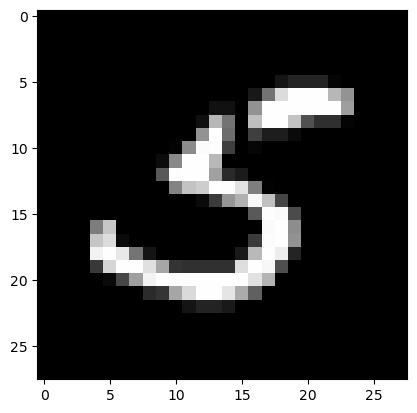

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt 

plt.imshow(test_mnist.data[407], cmap='gray')

In [6]:
torch.argmax(net(torch.reshape(test_mnist.data[407].float(),
                               (1, 1, 28, 28))))

tensor(5)

In [7]:
test_data = TensorDataset(
    test_mnist.data.reshape((test_mnist.data.shape[0], 1, 28, 28)).float(),
    F.one_hot(test_mnist.targets, 10).float())
test_loader = DataLoader(test_data, batch_size=len(test_data))

for X, y in test_loader:
    preds = net(X)
    pred_labels = torch.argmax(preds, axis=1)
    test_accuracy = 100 * torch.mean(
        (pred_labels == torch.argmax(y, axis=1)).float()).item()
    print(f"Test accuracy: {test_accuracy}")

Test accuracy: 77.23333239555359
